<a href="https://colab.research.google.com/github/suginouchi/lecture/blob/main/alds03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【問1】教科書，配布資料を参考にマージソートを実装してください．
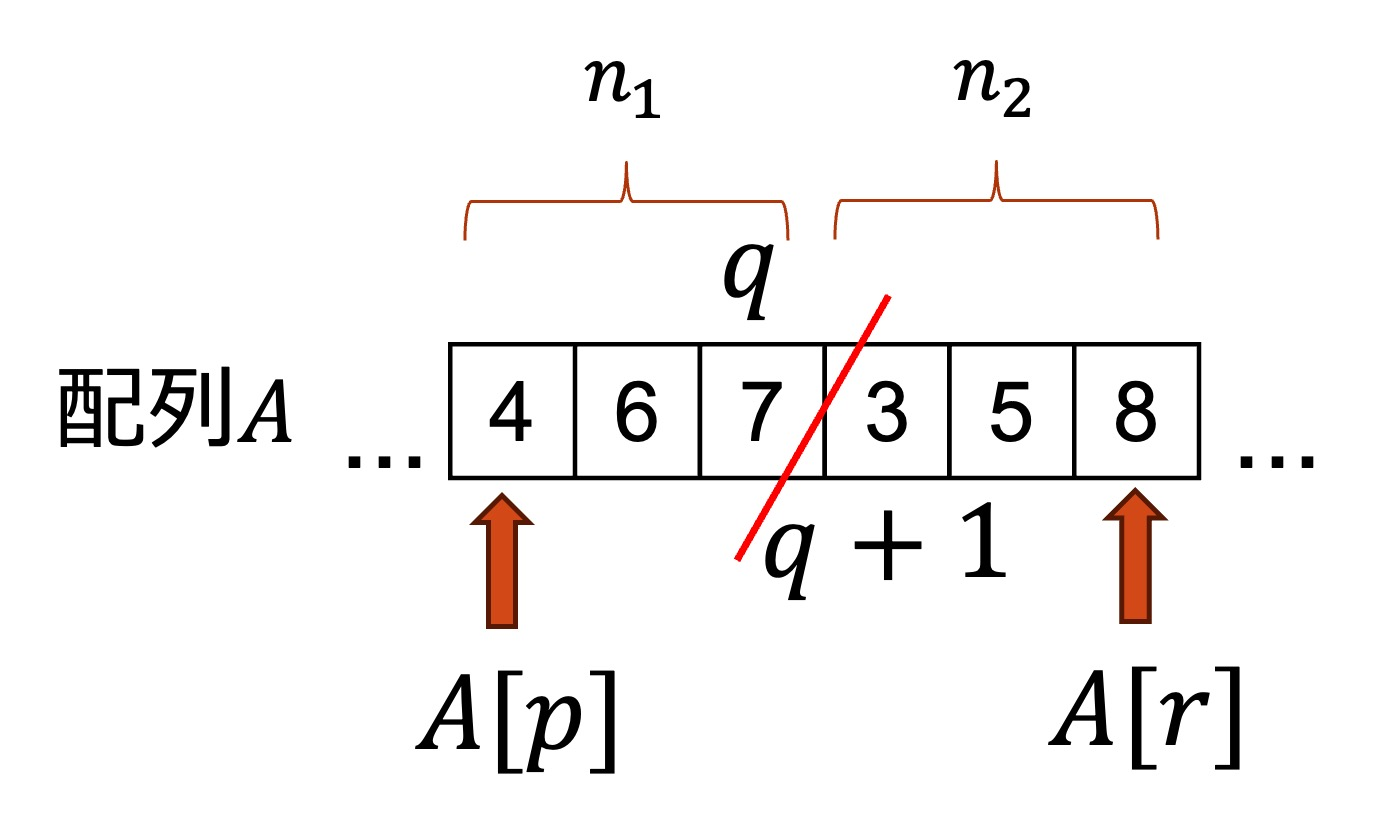

In [ ]:
import random
import time

In [ ]:
def MERGE1(A, p, q, r):
  n1 = q-p+1
  n2 = r-q

  # 配列AをLとRに分割する
  L, R = A[p:p+n1], A[q+1:q+n2+1]

  # 意図通りに動いているか，適宜print()しながら確認しましょう．
  # print(A)
  # print(p,q,r, L, R)

  # 最後に番兵を追加．
  L.append(float('inf'))
  R.append(float('inf'))

  i,j = 0,0

  for k in range(p, r+1):
    if L[i] <= R[j]:
      A[k] = L[i]
      i+=1
    else:
      A[k] = R[j]
      j+=1
  # print('merge終了', A)


In [ ]:
def MERGE_SORT1(A,p,r):

  # print("P, R,", p,r)
  if p<r:
    q = (p+r)//2
    # print("P,Q, R,", p,q,r)
    # print('MS',A[p:q],A[q:r])
    MERGE_SORT1(A,p,q)
    MERGE_SORT1(A,q+1,r)
    MERGE1(A,p,q,r)


In [ ]:
n=10
A =list(range(1,n+1))
print("シャッフル前",A)

random.shuffle(A)
print("シャッフル後",A)

MERGE_SORT1(A,0,len(A)-1)
print('ソート後',A)

シャッフル前 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
シャッフル後 [2, 10, 3, 7, 6, 5, 9, 4, 1, 8]
ソート後 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


【問2】マージソートを改良する．
番兵を使わずに実装する．

In [ ]:
def MERGE2(A, p, q, r):
  n1 = q-p+1
  n2 = r-q

  L, R = A[p:p+n1], A[q+1:q+n2+1]

  # print('A', A)
  # print('L', L)
  # print('R', R)

  i,j = 0,0

  for k in range(p, r+1):
    # print('--->', k, '(',p,r+1,')')
    if L[i] <= R[j]:
      A[k] = L[i]
      i+=1

      # 最後まで見たら残りをコピー
      if len(L)<=i:
        k+=1
        # print(range(k,k+len(R)-j) ,range(j, len(R)))
        for k2, j2 in zip(range(k,k+len(R)-j) ,range(j, len(R))):
          # print(k2,j2)
          A[k2] = R[j2]

        # kについてのfor文から抜ける
        break
    else:
      A[k] = R[j]
      j+=1

      # 最後まで見たら残りをコピー
      if len(R)<=j:
        # print(range(k+1, k+1+len(L)-i), range(i, len(L)))
        for k2, i2 in zip(range(k+1, k+1+len(L)-i), range(i, len(L))):
          # print(k2,i2)
          A[k2] = L[i2]
          # k,i = k+1, i+1
        break
  # print('merge終了', A)


######################################################################
def MERGE_SORT2(A,p,r):

  # print("P, R,", p,r)
  if p<r:
    q = (p+r)//2
    # print("P,Q, R,", p,q,r)
    # print('MS',A[p:q],A[q:r])
    MERGE_SORT2(A,p,q)
    MERGE_SORT2(A,q+1,r)
    MERGE2(A,p,q,r)



In [ ]:
n=4
A =list(range(1,n+1))
print("シャッフル前",A)

random.shuffle(A)
print("シャッフル後",A)

MERGE_SORT2(A,0,len(A)-1)
print('ソート後',A)

シャッフル前 [1, 2, 3, 4]
シャッフル後 [1, 3, 4, 2]
ソート後 [1, 2, 3, 4]


【問3】マージソートを更に改良する．
MERGE3()関数では，引数p,rについてp-rがk以下の時に挿入ソートを用いる．

In [ ]:
def MERGE3(A, p, q, r, m):
  n1 = q-p+1
  n2 = r-q

  L, R = A[p:p+n1], A[q+1:q+n2+1]

  # print('A', A)
  # print('L', L)
  # print('R', R)

  i,j = 0,0

  for k in range(p, r+1):
    # print('--->', k, '(',p,r,')')
    if L[i] <= R[j]:
      A[k] = L[i]
      i+=1
      if len(L)<=i:
        for k2, j2 in zip(range(k+1,k+1+len(R)-j) ,range(j, len(R))):
          A[k2] = R[j2]
        break
    else:
      A[k] = R[j]
      j+=1
      if len(R)<=j:
        for k2, i2 in zip(range(k+1, k+1+len(L)-i), range(i, len(L))):
          A[k2] = L[i2]
        break
  # print('merge終了', A)

######################################################################
def INSERTION_SORT(A,p,r):
  # print("INSERTION_SORT",p,r)
  # print("bef", A[p:r])

  for j in range(p+1,r+1):
    key = A[j]
    i=j-1
    while i>=p and key<A[i]:
      A[i+1] = A[i]
      i=i-1

    A[i+1] = key

  # print("aft", A[p:r])


######################################################################
def MERGE_SORT3(A,p,r,m):

  # print("P, R,", p,r)

  # ソート対象が指定のサイズm以下なら挿入ソート
  if 1<=r-p<=m:
    INSERTION_SORT(A,p,r)

  # 十分に大きい時はマージソートの手続き
  elif p<r:
    q = (p+r)//2
    # print("P,Q, R,", p,q,r)
    # print('MS',A[p:q],A[q:r])
    MERGE_SORT3(A,p,q,m)
    MERGE_SORT3(A,q+1,r,m)
    MERGE3(A,p,q,r,m)



In [ ]:
n=20000
A =list(range(1,n+1))
# print("シャッフル前",A)

#　挿入ソートに切り替えるタイミングmを変更しながら，MS3()を繰り返す．
for m in [0,10,20,30,40,60,80,100,150,200]:
  random.shuffle(A)
  print("  シャッフル後",A[:5])
  t1=time.perf_counter()
  MERGE_SORT3(A,0,len(A)-1,m)
  print('  ソート後',A[:5])
  t2=time.perf_counter()
  print("m:",m, "経過時間",t2-t1)


print(' ----- * ----- * ----- * ----- * ----- * ----- ')

########
# 比較対象 MS1()
random.shuffle(A)
print("  シャッフル後",A[:5])
t1=time.perf_counter()
MERGE_SORT1(A,0,len(A)-1)
print('  ソート後',A[:5])
t2=time.perf_counter()
print("MS1(): 経過時間",t2-t1)

########
# 比較対象 MS2()
random.shuffle(A)
print("  シャッフル後",A[:5])
t1=time.perf_counter()
MERGE_SORT2(A,0,len(A)-1)
print('  ソート後',A[:5])
t2=time.perf_counter()
print("MS2(): 経過時間",t2-t1)



  シャッフル後 [15370, 5258, 18536, 13241, 12707]
  ソート後 [1, 2, 3, 4, 5]
m: 0 経過時間 0.19043520400009584
  シャッフル後 [1080, 8232, 4057, 15917, 15019]
  ソート後 [1, 2, 3, 4, 5]
m: 10 経過時間 0.0712465249998786
  シャッフル後 [14454, 8001, 7314, 19174, 15605]
  ソート後 [1, 2, 3, 4, 5]
m: 20 経過時間 0.1469514979999076
  シャッフル後 [13713, 3188, 6481, 16825, 17547]
  ソート後 [1, 2, 3, 4, 5]
m: 30 経過時間 0.1490086409999094
  シャッフル後 [17267, 9860, 3344, 7792, 9641]
  ソート後 [1, 2, 3, 4, 5]
m: 40 経過時間 0.18461598800013235
  シャッフル後 [4816, 15811, 53, 4223, 7505]
  ソート後 [1, 2, 3, 4, 5]
m: 60 経過時間 0.18070768699999462
  シャッフル後 [3865, 13582, 13549, 17948, 13358]
  ソート後 [1, 2, 3, 4, 5]
m: 80 経過時間 0.2454023010000128
  シャッフル後 [13824, 4919, 14741, 18072, 9502]
  ソート後 [1, 2, 3, 4, 5]
m: 100 経過時間 0.2559561129996837
  シャッフル後 [2634, 1431, 980, 10806, 12760]
  ソート後 [1, 2, 3, 4, 5]
m: 150 経過時間 0.24895109399994908
  シャッフル後 [9611, 491, 2843, 1420, 15745]
  ソート後 [1, 2, 3, 4, 5]
m: 200 経過時間 0.3938595639997402
 ----- * ----- * ----- * ----- * ----- * ---

In [ ]:
def MERGE4(A, p, q, r, m):
  n1 = q-p+1
  n2 = r-q

  L, R = A[p:p+n1], A[q+1:q+n2+1]
  L.append(float('inf'))
  R.append(float('inf'))

  i,j = 0,0

  for k in range(p, r+1):
    if L[i] <= R[j]:
      A[k] = L[i]
      i+=1

    else:
      A[k] = R[j]
      j+=1



######################################################################
def MERGE_SORT4(A,p,r,m):

  # print("P, R,", p,r)

  # ソート対象が指定のサイズm以下なら挿入ソート
  if 1<=r-p<=m:
    INSERTION_SORT(A,p,r)

  # 十分に大きい時はマージソートの手続き
  elif p<r:
    q = (p+r)//2
    # print("P,Q, R,", p,q,r)
    # print('MS',A[p:q],A[q:r])
    MERGE_SORT4(A,p,q,m)
    MERGE_SORT4(A,q+1,r,m)
    MERGE4(A,p,q,r,m)



In [ ]:
n=20000
A =list(range(1,n+1))
# print("シャッフル前",A)

#　挿入ソートに切り替えるタイミングmを変更しながら，MS3()を繰り返す．
for m in [0,10,20,30,40,60,80,100,150,200]:
  random.shuffle(A)
  print("  シャッフル後",A[:5])
  t1=time.perf_counter()
  MERGE_SORT4(A,0,len(A)-1,m)
  print('  ソート後',A[:5])
  t2=time.perf_counter()
  print("m:",m, "経過時間",t2-t1)


print(' ----- * ----- * ----- * ----- * ----- * ----- ')

########
# 比較対象 MS1()
random.shuffle(A)
print("  シャッフル後",A[:5])
t1=time.perf_counter()
MERGE_SORT1(A,0,len(A)-1)
print('  ソート後',A[:5])
t2=time.perf_counter()
print("MS1(): 経過時間",t2-t1)

########
# 比較対象 MS2()
random.shuffle(A)
print("  シャッフル後",A[:5])
t1=time.perf_counter()
MERGE_SORT2(A,0,len(A)-1)
print('  ソート後',A[:5])
t2=time.perf_counter()
print("MS2(): 経過時間",t2-t1)



  シャッフル後 [1023, 9735, 9539, 13100, 13173]
  ソート後 [1, 2, 3, 4, 5]
m: 0 経過時間 0.08205154400002357
  シャッフル後 [17597, 8780, 15291, 3602, 2176]
  ソート後 [1, 2, 3, 4, 5]
m: 10 経過時間 0.05564038300008178
  シャッフル後 [10691, 777, 4352, 13173, 10846]
  ソート後 [1, 2, 3, 4, 5]
m: 20 経過時間 0.06201197200016395
  シャッフル後 [18381, 15039, 9911, 7169, 1550]
  ソート後 [1, 2, 3, 4, 5]
m: 30 経過時間 0.062446708000152285
  シャッフル後 [19195, 19068, 12369, 4712, 16014]
  ソート後 [1, 2, 3, 4, 5]
m: 40 経過時間 0.07529508100014937
  シャッフル後 [13186, 8964, 17884, 5155, 926]
  ソート後 [1, 2, 3, 4, 5]
m: 60 経過時間 0.1241151730000638
  シャッフル後 [18507, 16480, 13403, 1912, 17154]
  ソート後 [1, 2, 3, 4, 5]
m: 80 経過時間 0.22069609199979823
  シャッフル後 [19971, 16594, 14307, 9926, 5980]
  ソート後 [1, 2, 3, 4, 5]
m: 100 経過時間 0.2191078840000955
  シャッフル後 [19614, 15443, 4749, 18049, 14806]
  ソート後 [1, 2, 3, 4, 5]
m: 150 経過時間 0.23339192399998865
  シャッフル後 [10449, 19337, 2245, 6505, 652]
  ソート後 [1, 2, 3, 4, 5]
m: 200 経過時間 0.37189218799994705
 ----- * ----- * ----- * ----- * -